# 토치비전(torchvision) 소개하기

### 유명한 데이터셋들, 모델, 이미지 전처리 도구를 포함하고 있는 패키지이다.

#### 팁!! 자연어 처리는 토치텍스트(torchtext)라는 패키지가 있다.

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)
# 난 GPU연산이 불가능하니 넘어가도록 하자...

다음 기기로 학습합니다: cpu


### 만약 코랩에서 하고 싶다면 다음 방법을 따르도록 하자.
* GPU연결 : '런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU'
* CPU연결 : '런타임 > 런타임 유형 변경 > 하드웨어 가속기 > None'

In [3]:
# 랜덤시드 고정
random.seed(777)
torch.manual_seed(777)

# 당신이 CUDA를 쓴다!!! 그렇다면.
# torch.cuda.manual_seed_all(777)을 쓰도록하자.

In [4]:
# 하이퍼파라미터
training_epochs = 15
batch_size = 100

In [6]:
### 이게 그냥 datasets코드만 치면 오류가 난다. 해당 사이트가 크라우드플레어? 보호로 이동하기 때문에 이 코드를 푸가해 주어야 한다.


from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

# MNIST dataset
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# 첫번째 인자 root : 다운받을 경로
# 두번째 인자 train : 훈련데이터를 리턴 받음
# 세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환해 준다.
# 네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미이다.

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw




Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...


C:\Users\user\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [7]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
            batch_size=batch_size, # 배치 크기는 100
            shuffle=True,
            drop_last=True)

# drop_last는 데이터가 남을때 마지막 배치를 버리라는 뜻이다. 그래서 마지막 배치가 상대적으로 과대평가되는 현상을 막아준다.

In [8]:
# MNISt 모델
model = nn.Linear(784, 10, bias=True).to(device) # 이 to는 연산을 어디서 수행할지 정한다. 딩신이 cuda를 쓴다? 'cuda'를 쓰도록 하자.

# 28 * 28이기 때문에 입력 차원은 784이고 출력은 10이다. 소프트맥스니까~ 아이스 커피.
# bias는 편향 b를 사용할 것인지 묻는 것이다. 원래 기본값이 True이다.

In [9]:
# cost function과 optimizer 정의

criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 포함

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch : ', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch :  0001 cost =  0.534912467
Epoch :  0002 cost =  0.359308600
Epoch :  0003 cost =  0.331088215
Epoch :  0004 cost =  0.316574216
Epoch :  0005 cost =  0.307130277
Epoch :  0006 cost =  0.300207913
Epoch :  0007 cost =  0.294897288
Epoch :  0008 cost =  0.290830463
Epoch :  0009 cost =  0.287419587
Epoch :  0010 cost =  0.284589112
Epoch :  0011 cost =  0.281816214
Epoch :  0012 cost =  0.279919654
Epoch :  0013 cost =  0.277836800
Epoch :  0014 cost =  0.276022345
Epoch :  0015 cost =  0.274443209
Learning finished


tensor([ True,  True,  True,  ...,  True, False,  True])
Accuracy: 0.8867999911308289
Label:  3
Prediction:  3


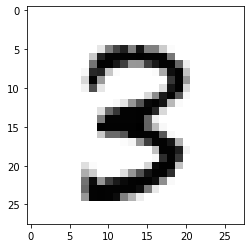

In [17]:
# 테스트 데이터를 사용하여 모델 테스트
with torch.no_grad(): # gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    print(correct_prediction)
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()
